In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import pandas as pd
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Read and display the CSV with Pandas
csv_path = os.path.join('raw data', 'Life Expectancy Data.csv')
df = pd.read_csv(csv_path, encoding="ISO-8859-1")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Cleaning Data:

In [2]:
# Identify incomplete rows
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [3]:
# Identify shape of DataFrame
df.shape

(2938, 22)

In [4]:
# Drop all rows with missing information
clean_df = df.dropna(how='any')
clean_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
# Verify dropped rows with shape
clean_df.shape

(1649, 22)

In [6]:
# Verify dropped rows
clean_df.count()

Country                            1649
Year                               1649
Status                             1649
Life expectancy                    1649
Adult Mortality                    1649
infant deaths                      1649
Alcohol                            1649
percentage expenditure             1649
Hepatitis B                        1649
Measles                            1649
 BMI                               1649
under-five deaths                  1649
Polio                              1649
Total expenditure                  1649
Diphtheria                         1649
 HIV/AIDS                          1649
GDP                                1649
Population                         1649
 thinness  1-19 years              1649
 thinness 5-9 years                1649
Income composition of resources    1649
Schooling                          1649
dtype: int64

In [7]:
# Determine the data types of each column.
clean_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
# Get a list of all of our columns for easy reference
clean_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
# Reorganizing the columns using double brackets

organized_df = clean_df[['Country', 'Year', 'Status', 'Life expectancy ', 'Population', 'Adult Mortality', 
                         'under-five deaths ', 'infant deaths', ' HIV/AIDS', 'Diphtheria ', 'Hepatitis B', 'Measles ', 
                         'Polio', ' thinness 5-9 years', ' thinness  1-19 years', 'Alcohol', ' BMI ', 'GDP', 
                         'percentage expenditure', 'Total expenditure', 'Income composition of resources', 
                         'Schooling']]
organized_df.head()

,Country,Year,Status,Life expectancy,Population,Adult Mortality,under-five deaths,infant deaths,HIV/AIDS,Diphtheria,...,Polio,thinness 5-9 years,thinness 1-19 years,Alcohol,BMI,GDP,percentage expenditure,Total expenditure,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,33736494.0,263.0,83,62,0.1,65.0,...,6.0,17.3,17.2,0.01,19.1,584.259210,71.279624,8.16,0.479,10.1
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5


In [10]:
# Renaming columns to remove white spaces

renamed_df = organized_df.rename(columns={"Life expectancy ":"Life Expectancy", 
                                          "under-five deaths ":"Under-Five Deaths", 
                                          "infant deaths":"Infant Deaths", 
                                          " HIV/AIDS":"HIV/AIDS", 
                                          "Diphtheria ":"Diphtheria",
                                          "Measles ":"Measles", 
                                          " thinness 5-9 years":"Thinness 5-9 years", 
                                          " thinness  1-19 years":"Thinness 1-19 years", 
                                          " BMI ":"BMI", 
                                          "percentage expenditure":"Percentage Expenditure", 
                                          "Total expenditure":"Total Expenditure", 
                                          "Income composition of resources":"Income Composition of Resources"})
renamed_df.head()

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,33736494.0,263.0,83,62,0.1,65.0,...,6.0,17.3,17.2,0.01,19.1,584.259210,71.279624,8.16,0.479,10.1
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5


In [11]:
# Filtered on all years from 2000-2014 (excludes 2015 data that relates to only two countries)
filtered_df = renamed_df.loc[(renamed_df["Year"] <= 2014)]
filtered_df

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
5,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,12777511.0,723.0,42,27,33.6,65.0,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,12633897.0,715.0,41,26,36.7,68.0,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,125525.0,73.0,40,25,39.8,71.0,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,12366165.0,686.0,39,25,42.1,75.0,...,76.0,1.7,1.6,1.72,25.9,548.587312,0.000000,6.16,0.427,9.8


# Exporting Ouput to CSV File:

In [12]:
# Export output to CSV File
filtered_df.to_csv("cleaned_data_output.csv")

# Exploring Data (Statistics):

In [13]:
filtered_df.describe()

,Year,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,Hepatitis B,Measles,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
count,1647.000000,1647.000000,1.647000e+03,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.00000,1647.000000,1647.000000
mean,2007.831815,69.299757,1.465092e+07,168.214936,44.223437,32.554948,1.986157,84.157863,79.214329,2226.494839,83.602307,4.902429,4.845355,4.535902,38.128112,5570.035273,699.557463,5.95456,0.631565,12.119854
std,4.082563,8.799045,7.050070e+07,125.343247,162.990487,120.915746,6.035666,21.584035,25.613177,10091.743981,22.379426,4.645701,4.591059,4.030093,19.754611,11482.144013,1760.210462,2.30014,0.183133,2.796172
min,2000.000000,44.000000,3.400000e+01,1.000000,0.000000,0.000000,0.100000,2.000000,2.000000,0.000000,3.000000,0.100000,0.100000,0.010000,2.000000,1.681350,0.000000,0.74000,0.000000,4.200000
25%,2005.000000,64.350000,1.929265e+05,77.000000,1.000000,1.000000,0.100000,82.000000,74.000000,0.000000,81.000000,1.700000,1.600000,0.815000,19.500000,461.936686,37.304832,4.40500,0.509500,10.350000
50%,2008.000000,71.700000,1.419631e+06,148.000000,4.000000,3.000000,0.100000,92.000000,89.000000,15.000000,93.000000,3.200000,3.000000,3.790000,43.700000,1592.572182,145.102253,5.84000,0.673000,12.300000
75%,2011.000000,75.000000,7.625918e+06,227.000000,29.000000,22.000000,0.700000,97.000000,96.000000,372.500000,97.000000,7.100000,7.050000,7.345000,55.800000,4726.998869,509.996755,7.46500,0.751000,14.000000
max,2014.000000,89.000000,1.293859e+09,723.000000,2100.000000,1600.000000,50.600000,99.000000,99.000000,131441.000000,99.000000,28.200000,27.200000,17.870000,77.100000,119172.741800,18961.348600,14.39000,0.936000,20.700000


# Exploring Data (Scatterplots with Correlation Values):

The Correlation (R) between Life Expectancy Age and Population is: -0.02


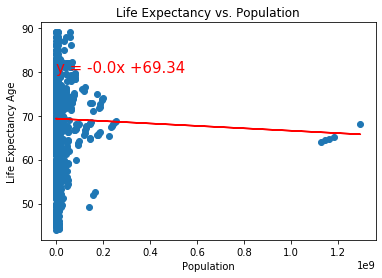

In [14]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Population"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Population")
plt.xlabel("Population")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(10,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Population is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 01 Scatterplot (Life Expectancy vs. Population).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Adult Mortality is: -0.7


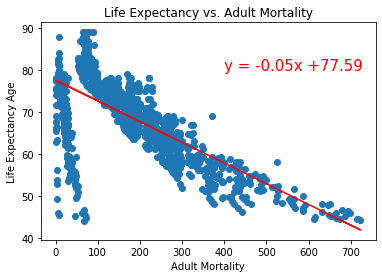

In [15]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Adult Mortality"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Adult Mortality")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(400,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 02 Scatterplot (Life Expectancy vs. Adult Mortality).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Under-Five Deaths is: -0.19


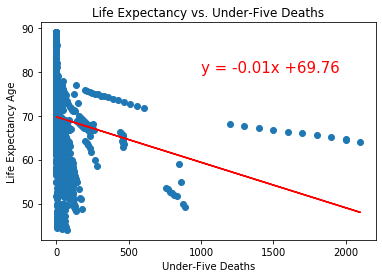

In [16]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Under-Five Deaths"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Under-Five Deaths")
plt.xlabel("Under-Five Deaths")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(1000,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Under-Five Deaths is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 03 Scatterplot (Life Expectancy vs. Under-Five Deaths).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Infant Deaths is: -0.17


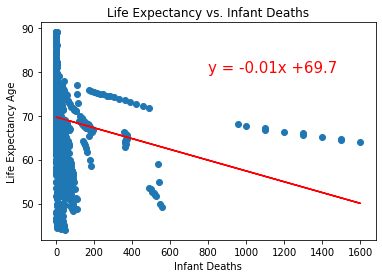

In [17]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Infant Deaths"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Infant Deaths")
plt.xlabel("Infant Deaths")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(800,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Infant Deaths is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 04 Scatterplot (Life Expectancy vs. Infant Deaths).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and HIV/AIDS is: -0.59


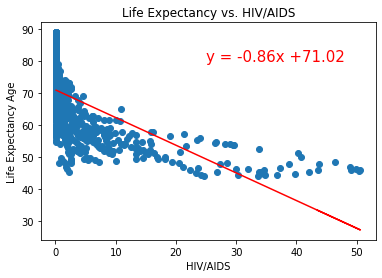

In [18]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["HIV/AIDS"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. HIV/AIDS")
plt.xlabel("HIV/AIDS")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(25,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and HIV/AIDS is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 05 Scatterplot (Life Expectancy vs. HIV_AIDS).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Diphtheria is: 0.34


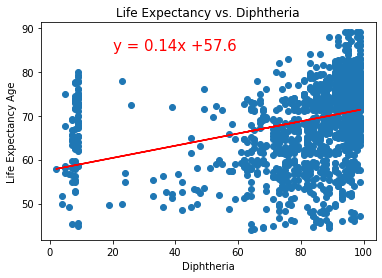

In [19]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Diphtheria"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Diphtheria")
plt.xlabel("Diphtheria")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(20,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Diphtheria is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 06 Scatterplot (Life Expectancy vs. Diphtheria).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Hepatitis B is: 0.2


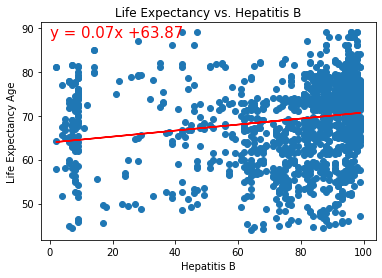

In [20]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Hepatitis B"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Hepatitis B")
plt.xlabel("Hepatitis B")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0,88),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Hepatitis B is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 07 Scatterplot (Life Expectancy vs. Hepatitis B).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Measles is: -0.07


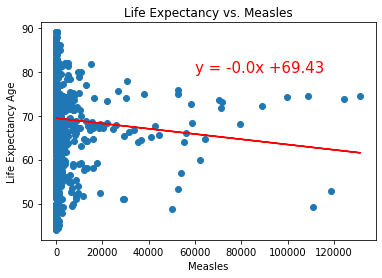

In [21]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Measles"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Measles")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(60000,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Measles is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 08 Scatterplot (Life Expectancy vs. Measles).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Polio is: 0.33


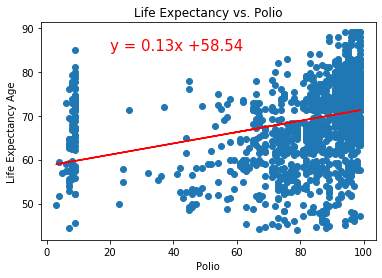

In [22]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Polio"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Polio")
plt.xlabel("Polio")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(20,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Polio is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 09 Scatterplot (Life Expectancy vs. Polio).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Thinness 5-9 years is: -0.46


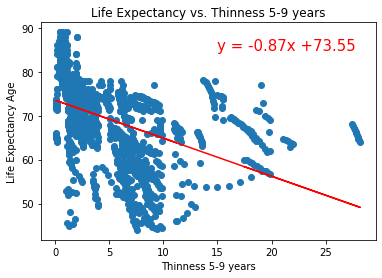

In [23]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Thinness 5-9 years"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Thinness 5-9 years")
plt.xlabel("Thinness 5-9 years")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(15,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Thinness 5-9 years is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 10 Scatterplot (Life Expectancy vs. Thinness 5-9 Years).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Thinness 1-19 years is: -0.46


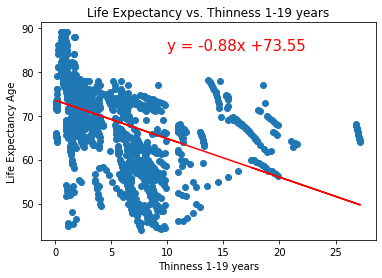

In [24]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Thinness 1-19 years"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Thinness 1-19 years")
plt.xlabel("Thinness 1-19 years")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Thinness 1-19 years is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 11 Scatterplot (Life Expectancy vs. Thinness 1-19 Years).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Alcohol is: 0.4


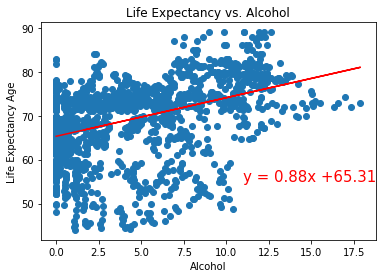

In [25]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Alcohol"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(11,55),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Alcohol is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 12 Scatterplot (Life Expectancy vs. Alcohol).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and BMI is: 0.54


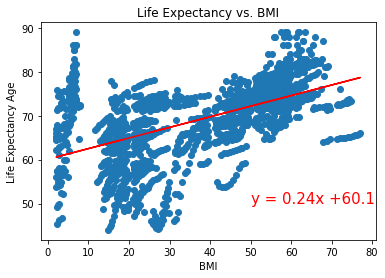

In [26]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["BMI"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(50,50), fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and BMI is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 13 Scatterplot (Life Expectancy vs. BMI).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and GDP is: 0.44


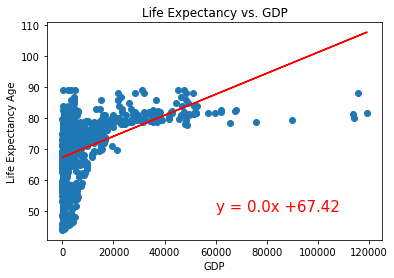

In [27]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["GDP"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(60000,50),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and GDP is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 14 Scatterplot (Life Expectancy vs. GDP).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Percentage Expenditure is: 0.41


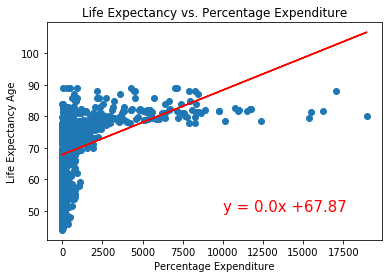

In [28]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Percentage Expenditure"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Percentage Expenditure")
plt.xlabel("Percentage Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(10000,50),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Percentage Expenditure is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 15 Scatterplot (Life Expectancy vs. Percentage Expenditure).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.18


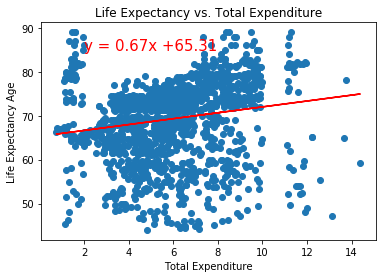

In [29]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Total Expenditure"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(2,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 16 Scatterplot (Life Expectancy vs. Total Expenditure).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Income Composition of Resources is: 0.72


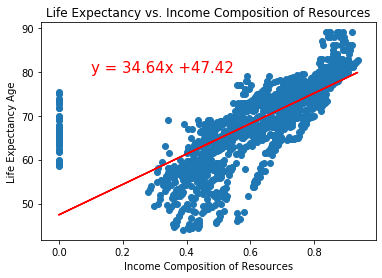

In [30]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Income Composition of Resources"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Income Composition of Resources")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.1,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 17 Scatterplot (Life Expectancy vs. Income Composition of Resources).png")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Schooling is: 0.73


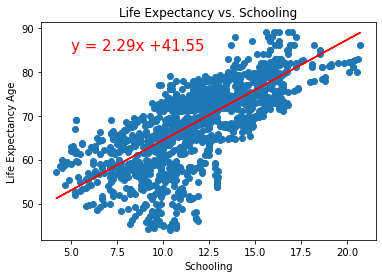

In [31]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Schooling"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Schooling")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(5,85),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Schooling is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 18 Scatterplot (Life Expectancy vs. Schooling).png")

# Show plot
plt.show()

# Exploring Data (Boxplots):

In [34]:
#Set the index as the 'status' of each country
status_df = filtered_df.set_index("Status")

#Separate developed/developing countries
developed = status_df.loc['Developed']
developing = status_df.loc['Developing']

status_df

,Country,Year,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,Hepatitis B,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,,
Developing,Afghanistan,2014,59.9,327582.0,271.0,86,64,0.1,62.0,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
Developing,Afghanistan,2013,59.9,31731688.0,268.0,89,66,0.1,64.0,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
Developing,Afghanistan,2012,59.5,3696958.0,272.0,93,69,0.1,67.0,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
Developing,Afghanistan,2011,59.2,2978599.0,275.0,97,71,0.1,68.0,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
Developing,Afghanistan,2010,58.8,2883167.0,279.0,102,74,0.1,66.0,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Developing,Zimbabwe,2004,44.3,12777511.0,723.0,42,27,33.6,65.0,68.0,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
Developing,Zimbabwe,2003,44.5,12633897.0,715.0,41,26,36.7,68.0,7.0,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
Developing,Zimbabwe,2002,44.8,125525.0,73.0,40,25,39.8,71.0,73.0,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0


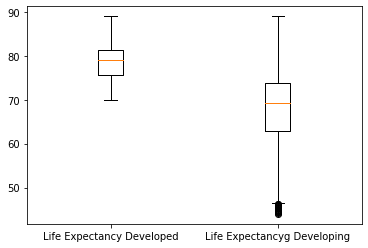

In [41]:
# Gather data for Life Expectancy
developed_life_expectancy = developed['Life Expectancy']
developing_life_expectancy = developing['Life Expectancy']


# Boxplots for Developed and Developing Countries
fig1, ax1 = plt.subplots()
ax1.boxplot([developed_life_expectancy, developing_life_expectancy])
plt.xticks([1, 2], ['Life Expectancy Developed', 'Life Expectancyg Developing'])
plt.show()

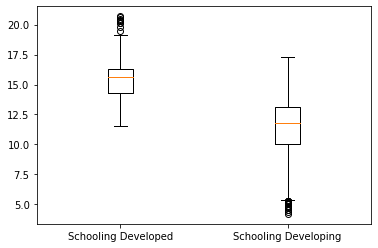

In [40]:
# Gather data for Social Factor
developed_schooling = developed['Schooling']
developing_schooling = developing['Schooling']


# Boxplots for Developed and Developing Countries
fig1, ax1 = plt.subplots()
ax1.boxplot([developed_schooling, developing_schooling])
plt.xticks([1, 2], ['Schooling Developed', 'Schooling Developing'])
plt.show()

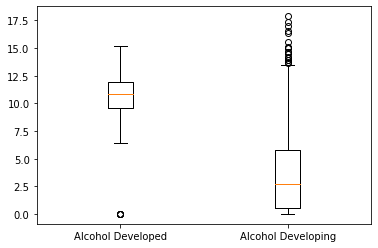

In [37]:
# Gather data for Lifestyle Factor
developed_alcohol = developed['Alcohol']
developing_alcohol = developing['Alcohol']


# Boxplots for Developed and Developing Countries
fig1, ax1 = plt.subplots()
ax1.boxplot([developed_alcohol, developing_alcohol])
plt.xticks([1, 2], ['Alcohol Developed', 'Alcohol Developing'])
plt.show()

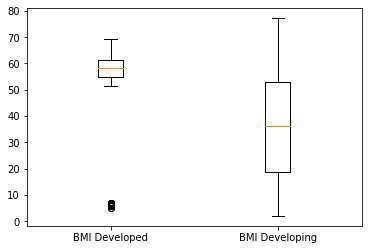

In [38]:
# Gather data for Lifestyle Factor
developed_bmi = developed['BMI']
developing_bmi = developing['BMI']

# Boxplots for Developing Countries
fig1, ax1 = plt.subplots()
ax1.boxplot([developed_bmi, developing_bmi])
plt.xticks([1, 2], ['BMI Developed', 'BMI Developing'])
plt.show()